# **Palmer Penguins**
***

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="1000" height="600">


This notebook contains my analysis of the famous palmer penguins dataset.

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/).


# About the data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. 
The goal of [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/) is to provide a great dataset for data exploration & visualization, as an alternative to Iris.


**Disclaimer:** I used ChatGPT to generate ideas and sketches of the content of the following notebook. The notebook is mainly my work, my own work as ChatGPT sometimes suggested clearly incorrect ideas, and in any case I had to rework the code and text it generated to meet my own needs. Also, I recycled some code as well as this disclaimer and ideas from the 'Iris' notebook we have elaborated during a series of lectures of the Principle of Data Analytics module.

## Imported libraries and modules

In [28]:
# Data frames.
import pandas as pd

# Plotting.

import seaborn as sns
import matplotlib.pyplot as plt

'''
from mpl_toolkits.mplot3d import Axes3D  
'''

# Numerical arrays.
import numpy as np


In [29]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Before being able to carry out an analysis of the data set, the variables in the data set need to be determined: The following table shows all available variables to work with: Species, island, bill length & depth, flipper length, body mass and sex.

In [30]:
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### For an better overview, the data is taken apart a bit
Looking at the first 20 rows and at the head and tail of the table.

In [31]:
# Display the first 30 rows using iloc
print("First 20 rows:")
print(df.iloc[0:19])

# Display the first few rows using head
print("\n\n\First few rows:")
print(df.head())

# Display the last few rows using tail
print("\n\n\Last few rows:")
print(df.tail())



First 20 rows:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             NaN            NaN                NaN   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
12  Adelie

We learn that a total of 344 samples were collected. Please note that we are starting 0, therefore the last number is 343. However, there are some lines that identify with 'NaN' (not a number); basically a numerical value for the variable is missing or has not been assessed. So let's have a look How many penguins don't have their sex determined for example?

In [32]:
# Count the number of occurrences of each sex, including NA values
'''
sex_counts = df['sex'].value_counts(dropna=False)

print("Number of each sex (including NaN):")
print(sex_counts)
'''
# Count the number of occurrences of each sex, including NA values
sex_counts = df['sex'].value_counts(dropna=False) # If dropna=False, NaN values are included in the count. They are treated as a separate category and included in the result of value_counts().

# Extract the total count of penguins
total_penguins = sex_counts.sum()

# Extract the count of penguins with undetermined sex (NA values)
undetermined_sex_count = sex_counts.get(float('nan'), 0)

# Calculate the count of penguins with determined sex
determined_sex_count = total_penguins - undetermined_sex_count

print(f"Of {total_penguins} total penguins, {undetermined_sex_count} don't have their sex determined.")



Of 344 total penguins, 11 don't have their sex determined.


Since we only looked at the head & tail of the data set, why not have a look at on how many islands the data was collected?

In [33]:
# Islands.
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

In [34]:
# Count of islands
island_counts = df['island'].value_counts()
number_of_islands = len(island_counts)

print("Number of islands:", number_of_islands)



Number of islands: 3


Data was collected on three islands: Torgersen, Dream & Biscoe.

In [35]:
# Group the DataFrame by 'island' and 'sex', then count the number of occurrences of each combination. This code was proposed by ChatGPT.
island_sex_counts = df.groupby(['island', 'sex']).size().reset_index(name='count')

print("Number and sex on each island:")
print(island_sex_counts)

Number and sex on each island:
      island     sex  count
0     Biscoe  FEMALE     80
1     Biscoe    MALE     83
2      Dream  FEMALE     61
3      Dream    MALE     62
4  Torgersen  FEMALE     24
5  Torgersen    MALE     23


In [36]:
# Count the number of penguins of each set.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

### Let's summarize the analysis so far:
- A total of 344 samples were collected on 3 different islands: Torgersen, Biscoe and Dream. 
- Samples were taken from 3 different penguin species: Adelie, Gentoo and Chinstrap. 
- Of 344 penguins, 11 don't have their sex determined, 168 are male and 165 are female. 
- The majority of samples was taken on Biscoe island, then Dream and least samples were collected on Torgersen island. 

### An important part of any analysis of a dataset is to establish the types of the different variables.


In [37]:
# Inspect (Types).
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

2 types identified: object & float64.

### df.describe() basically gives a summary of the numeric values in the palmer penguins dataset:
- Count of variables in the dataset which can point out to any possible missing values. 
- Calculates mean, standard deviation, minimum and maximum value
- 1st, 2nd and 3rd percentile of the columns with numeric value.

Please refer to [Generate descriptive statistics](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). 

In [38]:
# Describe the data set.
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


***
Flipper length

In [39]:
# Get the flipper lengths.
flen = df['flipper_length_mm']

# Show.
print(flen)

# Type.
print(type(flen))

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


In [40]:
# Just get the numpy array.
flen = flen.to_numpy()

# Show.
flen

array([181., 186., 195.,  nan, 193., 190., 181., 195., 193., 190., 186.,
       180., 182., 191., 198., 185., 195., 197., 184., 194., 174., 180.,
       189., 185., 180., 187., 183., 187., 172., 180., 178., 178., 188.,
       184., 195., 196., 190., 180., 181., 184., 182., 195., 186., 196.,
       185., 190., 182., 179., 190., 191., 186., 188., 190., 200., 187.,
       191., 186., 193., 181., 194., 185., 195., 185., 192., 184., 192.,
       195., 188., 190., 198., 190., 190., 196., 197., 190., 195., 191.,
       184., 187., 195., 189., 196., 187., 193., 191., 194., 190., 189.,
       189., 190., 202., 205., 185., 186., 187., 208., 190., 196., 178.,
       192., 192., 203., 183., 190., 193., 184., 199., 190., 181., 197.,
       198., 191., 193., 197., 191., 196., 188., 199., 189., 189., 187.,
       198., 176., 202., 186., 199., 191., 195., 191., 210., 190., 197.,
       193., 199., 187., 190., 191., 200., 185., 193., 193., 187., 188.,
       190., 192., 185., 190., 184., 195., 193., 18

Bill length

In [41]:
# Get the bill length
blength = df['bill_length_mm'].to_numpy()

# Show.
print(blength)

# Type
print(type(blength))

[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 37.8 41.1 38.6
 34.6 36.6 38.7 42.5 34.4 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5
 37.9 40.5 39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8
 36.  44.1 37.  39.6 41.1 37.5 36.  42.3 39.6 40.1 35.  42.  34.5 41.4
 39.  40.6 36.5 37.6 35.7 41.3 37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8
 33.5 39.7 39.6 45.8 35.5 42.8 40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1
 37.3 41.3 36.3 36.9 38.3 38.9 35.7 41.1 34.  39.6 36.2 40.8 38.1 40.3
 33.1 43.2 35.  41.  37.7 37.8 37.9 39.7 38.6 38.2 38.1 43.2 38.1 45.6
 39.7 42.2 39.6 42.7 38.6 37.3 35.7 41.1 36.2 37.7 40.2 41.4 35.2 40.6
 38.8 41.5 39.  44.1 38.5 43.1 36.8 37.5 38.1 41.1 35.6 40.2 37.  39.7
 40.2 40.6 32.1 40.7 37.3 39.  39.2 36.6 36.  37.8 36.  41.5 46.5 50.
 51.3 45.4 52.7 45.2 46.1 51.3 46.  51.3 46.6 51.7 47.  52.  45.9 50.5
 50.3 58.  46.4 49.2 42.4 48.5 43.2 50.6 46.7 52.  50.5 49.5 46.4 52.8
 40.9 54.2 42.5 51.  49.7 47.5 47.6 52.  46.9 53.5 49.  46.2 50.9 45.5
 50.9 5

Bill depth in mm

In [42]:
# Get the bill depth.
bdepth = df['bill_depth_mm']

# Show.
print(bdepth)

# Type.
print(type(bdepth))


0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: bill_depth_mm, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


In [43]:
# Get the bill depth
bdepth = df['bill_depth_mm'].to_numpy()

# Show.
bdepth


array([18.7, 17.4, 18. ,  nan, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 17.8, 19. , 20.7, 18.4, 21.5, 18.3, 18.7,
       19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8,
       18.9, 17. , 21.1, 20. , 18.5, 19.3, 19.1, 18. , 18.4, 18.5, 19.7,
       16.9, 18.8, 19. , 18.9, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1,
       18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17. , 18.2, 17.1, 18. ,
       16.2, 19.1, 16.6, 19.4, 19. , 18.4, 17.2, 18.9, 17.5, 18.5, 16.8,
       19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6,
       19.2, 18.8, 18. , 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1,
       18.5, 17.9, 20. , 16. , 20. , 18.6, 18.9, 17.2, 20. , 17. , 19. ,
       16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17. , 20.5, 17. , 18.6, 17.2,
       19.8, 17. , 18.5, 15.9, 19. , 17.6, 18.3, 17.1, 18. , 17.9, 19.2,
       18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5,
       17. , 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17

Body mass in gram

In [44]:
# Get the body mass in gram.
bmass = df['body_mass_g'].to_numpy()

# Show.
print(bmass)

# Type.
print(type(bmass))

[3750. 3800. 3250.   nan 3450. 3650. 3625. 4675. 3475. 4250. 3300. 3700.
 3200. 3800. 4400. 3700. 3450. 4500. 3325. 4200. 3400. 3600. 3800. 3950.
 3800. 3800. 3550. 3200. 3150. 3950. 3250. 3900. 3300. 3900. 3325. 4150.
 3950. 3550. 3300. 4650. 3150. 3900. 3100. 4400. 3000. 4600. 3425. 2975.
 3450. 4150. 3500. 4300. 3450. 4050. 2900. 3700. 3550. 3800. 2850. 3750.
 3150. 4400. 3600. 4050. 2850. 3950. 3350. 4100. 3050. 4450. 3600. 3900.
 3550. 4150. 3700. 4250. 3700. 3900. 3550. 4000. 3200. 4700. 3800. 4200.
 3350. 3550. 3800. 3500. 3950. 3600. 3550. 4300. 3400. 4450. 3300. 4300.
 3700. 4350. 2900. 4100. 3725. 4725. 3075. 4250. 2925. 3550. 3750. 3900.
 3175. 4775. 3825. 4600. 3200. 4275. 3900. 4075. 2900. 3775. 3350. 3325.
 3150. 3500. 3450. 3875. 3050. 4000. 3275. 4300. 3050. 4000. 3325. 3500.
 3500. 4475. 3425. 3900. 3175. 3975. 3400. 4250. 3400. 3475. 3050. 3725.
 3000. 3650. 4250. 3475. 3450. 3750. 3700. 4000. 3500. 3900. 3650. 3525.
 3725. 3950. 3250. 3750. 4150. 3700. 3800. 3775. 37


### Let's visualize the body mass of the penguins in a histogram


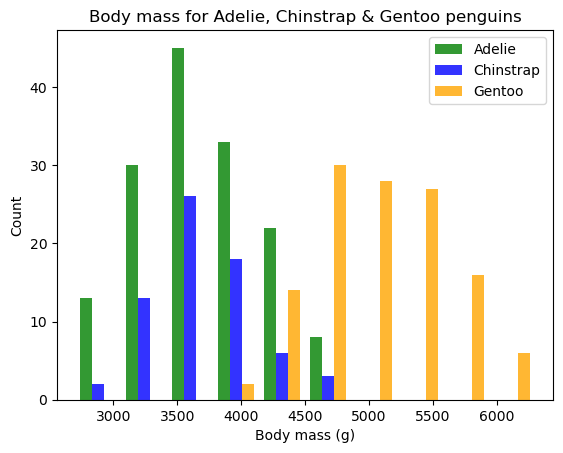

In [45]:
# Create histogram

plt.hist([df[df['species'] == 'Adelie']['body_mass_g'],
          df[df['species'] == 'Chinstrap']['body_mass_g'],
          df[df['species'] == 'Gentoo']['body_mass_g']],
         bins=10, stacked=False, color=['green', 'blue', 'orange'],
         alpha=0.8, label=['Adelie', 'Chinstrap', 'Gentoo'])

# Set labels and title
plt.xlabel('Body mass (g)')
plt.ylabel('Count')
plt.title('Body mass for Adelie, Chinstrap & Gentoo penguins')

# Add legend
plt.legend()

# Show plot
plt.show()

The Gentoo penguin is the heaviest and largest of the three species, whereas Adelie and Chinstrap are fairly similar in size, though a significantly higher number of samples were taken from the Adelie species. 

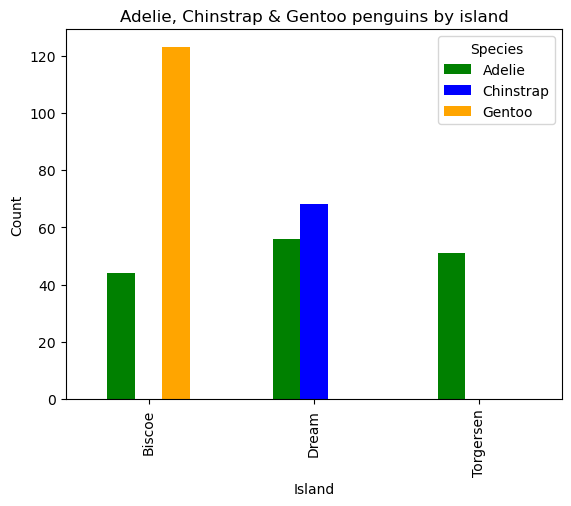

In [46]:


# Grouping the data by both species and islands
grouped_data = df.groupby(['species', 'island'])['body_mass_g'].count().unstack()

# Transpose the grouped data
grouped_data = grouped_data.T

# Plotting a stacked bar chart
grouped_data.plot(kind='bar', stacked=False, color=['green', 'blue', 'orange'])

# Set labels and title
plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Adelie, Chinstrap & Gentoo penguins by island')

# Add legend
plt.legend(title='Species')

# Show plot
plt.show()


Between 40 and 60 Adelie samples were taken on all three Islands whereas for the Chinstrap species samples were taken at Dream island and for Gentoo at Biscoe only. It also appears that going by number of samples taken the Gentoo species is the most abundant at Biscoe Island and Chinstrap penguins are only found at Dream. This has also been explored by Allison Horst [here](https://allisonhorst.github.io/palmerpenguins/articles/intro.html#highlights).

## Two variable plots : Bill length vs bill depth

Text(0.5, 1.0, 'Palmer Penguins Data Set')

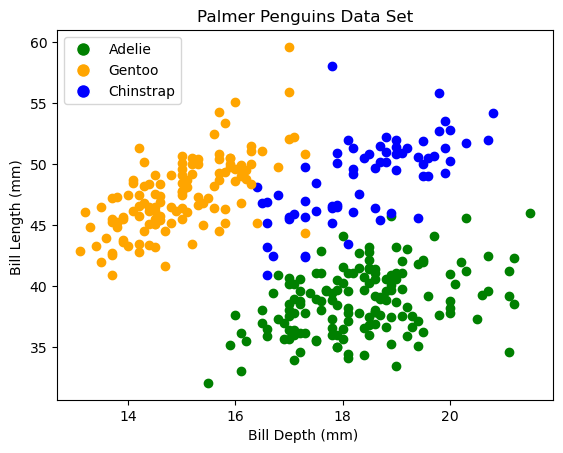

In [47]:
# Define colors for each species by creating dictionary.
colors = {'Adelie': 'green', 'Gentoo': 'orange', 'Chinstrap': 'blue'}

# Create a new figure and set of axes.
fig, ax = plt.subplots(1, 1)

# Plot the data points with color coding based on species.
for i in range(len(bdepth)):
    species_color = colors[df['species'][i]] if df['species'][i] in colors else 'k'  # Access species column
    ax.plot(bdepth[i], blength[i], 'o', c=species_color)

# It's a common convention in programming to use 'k' to represent black and 'i'(index) as loop variable.

'''
# Simple Plot.
ax.plot(bdepth, blength, 'o')   # Displays as 'Xs'
'''


# Axis labels.
ax.set_xlabel('Bill Depth (mm) ')
ax.set_ylabel('Bill Length (mm) ')


# Add legend.
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Adelie', markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Gentoo', markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Chinstrap', markerfacecolor='blue', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left')

# Title.
ax.set_title('Palmer Penguins Data Set')




Both Gentoo and Chinstrap species do have bill similar in size, though Gentoo are larger in body size as visualized above. Adelie bills are overall smaller or have less length & depth.

## Two variable plots : Flipper length vs body mass

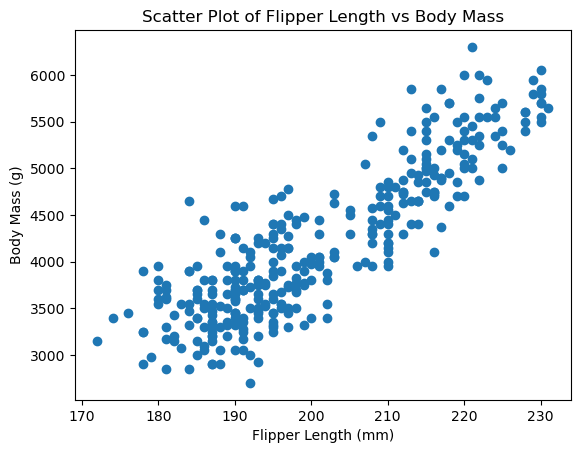

In [48]:
plt.scatter(flen, bmass)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.show()

### Let's analyse the correlation 

In [59]:
# Measure the correlation
np.corrcoef(bmass, flen)

array([[nan, nan],
       [nan, nan]])

This result does obviously not look right so I did a bit of research to find out how to exclude NaN (Not a Number) value

## Three variable plots
***

KeyError: 0

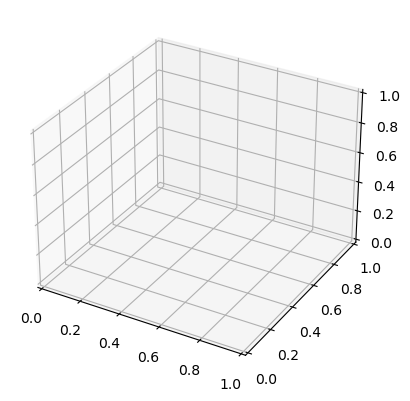

In [50]:
# I wanted to try out a 3D plot and looked up a suitable code here: https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define colors for each species
colors = {'Adelie': 'g', 'Gentoo': 'o', 'Chinstrap': 'b'}

# Create a new figure and set of axes.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot.
for i in range(len(flen)):
    ax.scatter(flen[i], blength[i], bdepth[i], c=colors[df[i]], marker='o')


# Axis labels.
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Bill Length (mm)')
ax.set_zlabel('Body Mass (g)')

# Title.
ax.set_title('Palmer Penguins Data Set')

# Show the plot.
plt.show()

### Further reading and references
***
Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/

https://archive.ics.uci.edu/dataset/690/palmer+penguins-3

https://github.com/mwaskom/seaborn-data/bob/master/penguins.csv

Brad Solomon (2020) Python Plotting With Matplotlib (Guide) https://realpython.com/python-matplotlib-guide/#understanding-pltsubplots-notation

Wikipedia:

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Matplotlib.org documentation:

https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

NumPy.org documentation:

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Pandas.pydata.org documentation:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

https://pandas.pydata.org/docs/reference/frame.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

Geeksforgeeks.org:

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/

The impact of NaN values on Pearson correlation https://pythonhint.com/post/6173294532526709/pearson-correlation-and-nan-values




***

## End